In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Logistic Regression

Logistic Regression model computes a
weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the
Linear Regression model does, it outputs the logistic of this result.

$$\hat{p} = h_{\theta}(x) = \sigma(\theta^{T}x)$$

where $\sigma(\cdot)$ is the sigmoid function:

$$\sigma(t) = \frac{1}{1 + e^{-t}}$$

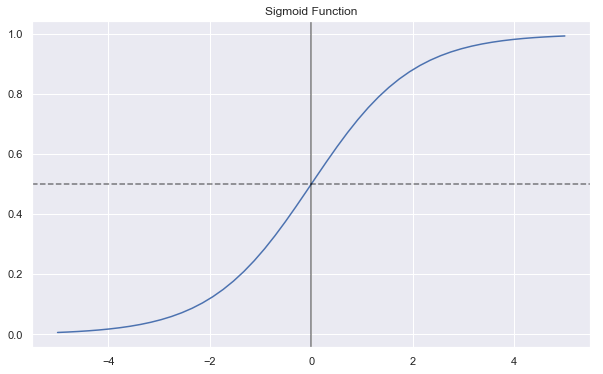

In [3]:
sigm = lambda t: 1 / (1 + np.e**(-t))
t = np.linspace(-5, 5)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(t, sigm(t))
ax.axvline(0, color='black', alpha=0.5)
ax.axhline(0.5, color='black', linestyle='--', alpha=0.5)
ax.set_title('Sigmoid Function');

For the 2-classes model, we assume that 

$$P(y=1|x:\theta) = h_{\theta}(x)$$

$$P(y=0|x:\theta) = 1 - h_{\theta}(x)$$

Note that,

$$P(y|x;\theta)=(h_{\theta}(x))^{y}(1 - h_{\theta}(x))^{1 - y}$$

Logistic Regression models are usually fit by maximum likelihood estimation:

$$L(\theta) = \Pi_{i=1}^{m}(h_{\theta}(x^{(i)}))^{y^{(i)}}(1 - h_{\theta}(x^{(i)}))^{1 - y^{(i)}}$$

As before, it will be easier to maximize the log likelihood:

$$l(\theta) = \sum_{i=1}^{m}y^{(i)}log(h_{\theta}(x^{(i)}) + (1 - y^{(i)})(1 - h_{\theta}(x^{(i)})$$

$$\frac{\partial l(\theta)}{\partial \theta_{j}} = (y - h_{\theta}(x))x_{j}$$

We can maximize the likelihood using gradient ascent. For stochastic gradient ascent, the update rule is:

$$\theta_{j} := \theta_{j} + \alpha (y ^{i} - h_{\theta}(x^{(i)}))x_{j}$$

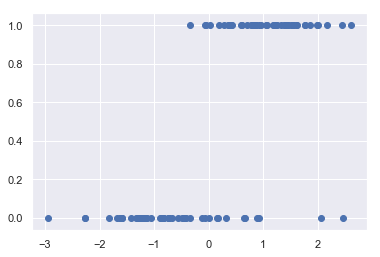

In [4]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_repeated=0)
plt.scatter(X[:, 1], y)

In [5]:
def ga_logistic_regression(X, y, alpha, epochs):
    
    m, n = X.shape
    X_aug = np.concatenate([np.ones((m, 1)), X], axis=1)
    
    theta = np.random.randn(n+1, 1)
    for it in range(epochs):
        for i in range(m):
            
            theta = theta + alpha * (y[i] - sigm(theta.T @ X_aug[i][:, np.newaxis])).ravel() * X_aug[i][:, np.newaxis]
            
    return theta

coef = ga_logistic_regression(X, y, 0.01, 1000)
z = (coef[0] + X @ coef[1:]).ravel()
y_pred = sigm(z) > 0.5

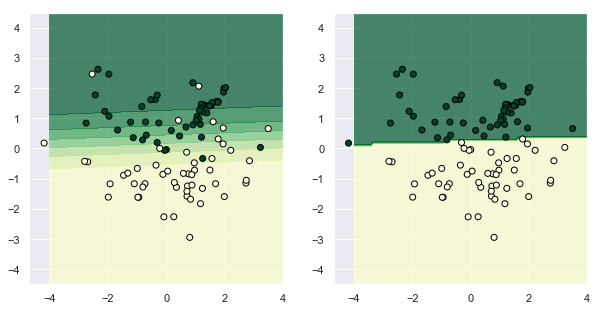

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))



x1 = np.linspace(-4, 4, 100)
x2 = np.linspace(-4.5, 4.5, 100)

X1, X2 = np.meshgrid(x1, x2)

Y_pred = sigm(coef[0] + coef[1] * X1 + coef[2] * X2)

ax[0].contourf(X1, X2, Y_pred, cmap='YlGn', alpha=0.7)
ax[0].scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', cmap='YlGn')
ax[1].contourf(X1, X2, Y_pred > 0.5, cmap='YlGn', alpha=0.7)
ax[1].scatter(X[:, 0], X[:, 1], c=y_pred, edgecolors='black', cmap='YlGn')

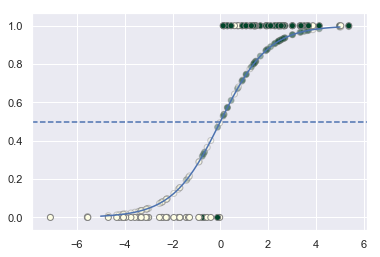

In [7]:
plt.plot(t, sigm(t))
plt.scatter(z, sigm(z), c=y, cmap='YlGn', edgecolor='gray', alpha=0.4)
plt.scatter(z, sigm(z) > 0.5 , c=y, cmap='YlGn', edgecolor='gray')
plt.axhline(0.5, linestyle='--')

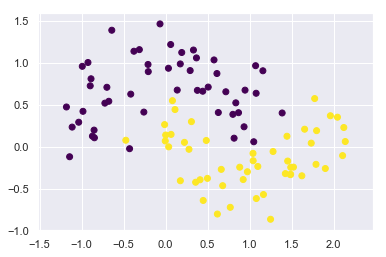

In [8]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.axis('equal');

In [9]:
def model_prediction_surface_plot(model, x1_bounds, x2_bounds, ax=None, prob=True):
    
    ax = ax or plt.gca()
    
    x1 = np.linspace(*x1_bounds, 100)
    x2 = np.linspace(*x2_bounds, 100)
    
    X1, X2 = np.meshgrid(x1, x2)
    
    if prob:
    
        P = model.predict_proba(np.array([X1.ravel(), X2.ravel()]).T)[:, 1].reshape(100, 100)
        ax.contourf(X1, X2, P, cmap='viridis',)
    else:
        Y = model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(100, 100)
        ax.contourf(X1, X2, Y, cmap='viridis',)
    

C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


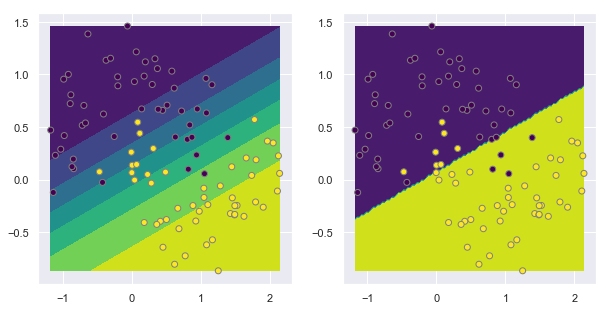

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

model = LogisticRegression()
model.fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', zorder=2, edgecolors='gray')
model_prediction_surface_plot(model, (X[:, 0].min(), X[:, 0].max()), (X[:, 1].min(), X[:, 1].max()), ax=ax[0])

ax[1].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', zorder=2, edgecolors='gray')
model_prediction_surface_plot(model, (X[:, 0].min(), X[:, 0].max()), (X[:, 1].min(), X[:, 1].max()), ax=ax[1], prob=False)

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


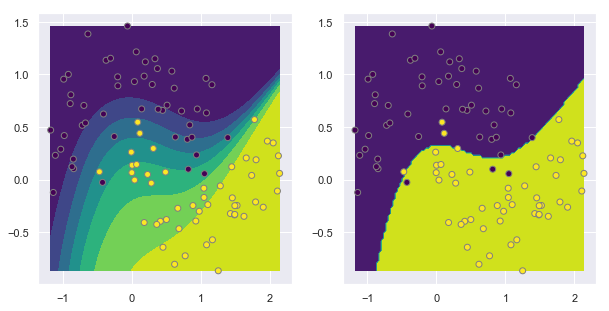

In [17]:
from sklearn.preprocessing import PolynomialFeatures

model = Pipeline(steps=[('poly', PolynomialFeatures(degree=4, include_bias=False)),
                           ('logit', LogisticRegression())])

model.fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', zorder=2, edgecolors='gray')
model_prediction_surface_plot(model, (X[:, 0].min(), X[:, 0].max()), (X[:, 1].min(), X[:, 1].max()), ax=ax[0])

ax[1].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', zorder=2, edgecolors='gray')
model_prediction_surface_plot(model, (X[:, 0].min(), X[:, 0].max()), (X[:, 1].min(), X[:, 1].max()), ax=ax[1], prob=False)

### Accuracy Score

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [19]:
X = cancer['data']
y = cancer['target']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression(C=0.1)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('Train Accuracy: ', accuracy_score(y_train, y_train_pred))
print('Test Accuracy: ', accuracy_score(y_test, y_test_pred))

Train Accuracy:  0.9623115577889447
Test Accuracy:  0.9181286549707602


C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10)

cs = [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]

train_scores = {str(c): [] for c in cs}
test_scores = {str(c): [] for c in cs}

for train, test in kfold.split(X, y):
    
    for c in cs:
        
        model = LogisticRegression(C=c)
        model.fit(X[train], y[train])
        
        y_train_pred = model.predict(X[train])
        y_test_pred = model.predict(X[test])
        
        train_scores[str(c)].append(accuracy_score(y[train], y_train_pred))
        test_scores[str(c)].append(accuracy_score(y[test], y_test_pred))


C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

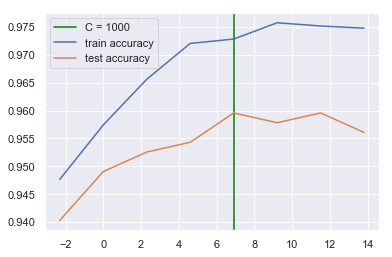

In [32]:
train_mean_scores = [np.mean(train_scores[str(c)]) for c in cs]
test_mean_scores = [np.mean(test_scores[str(c)]) for c in cs]
best_c = cs[np.argmax(test_mean_scores)]
plt.axvline(np.log(best_c), label='C = {}'.format(best_c), color='green')
plt.plot(np.log(cs), train_mean_scores, label='train accuracy')
plt.plot(np.log(cs), test_mean_scores, label='test accuracy')
plt.legend()

C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Best Parameters:  {'logit__C': 0.1, 'logit__penalty': 'l1', 'poly__degree': 2}
Best Score:  0.9736379613356766


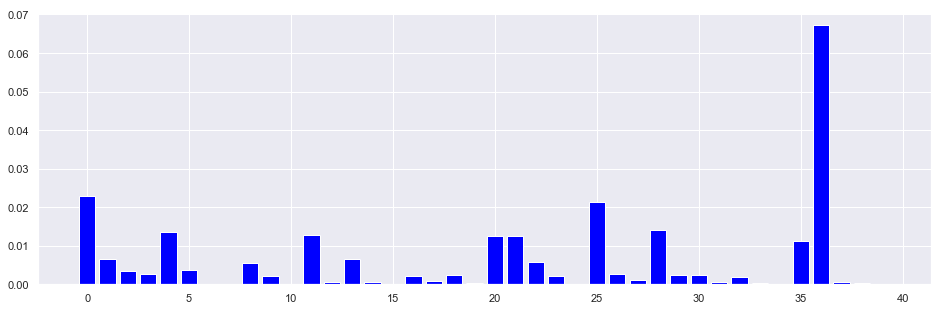

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('poly', PolynomialFeatures(include_bias=False)),
                     ('logit', LogisticRegression(n_jobs=4))])

grid = {'poly__degree': [1, 2],
       'logit__C': [0.1, 1, 10, 100, 1000],
       'logit__penalty': ['l1', 'l2']}

model = GridSearchCV(pipeline, grid, cv=10, scoring='accuracy', n_jobs=4)
model.fit(X, y)

print('Best Parameters: ', model.best_params_)
print('Best Score: ', model.best_score_)

coefficients = model.best_estimator_.named_steps['logit'].coef_
coefficients_non_zero = coefficients[coefficients > 1e-5]
plt.figure(figsize=(16, 5))
plt.bar(range(len(coefficients_non_zero)), coefficients_non_zero.ravel(), color='blue');

## Dealing With Imbalanced Data

In [41]:
card = pd.read_csv('data/creditcardfraud/creditcard.csv')
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


0    284315
1       492
Name: Class, dtype: int64

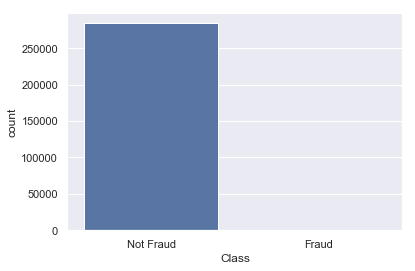

In [42]:
display(card['Class'].value_counts())
ax = sns.countplot(card['Class'])
ax.set_xticklabels(['Not Fraud', 'Fraud']);

In [43]:
X = card.drop('Class', axis=1)
y = card['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('Train Accuracy: ', accuracy_score(y_train, y_train_pred))
print('Test Accuracy: ', accuracy_score(y_test, y_test_pred))

C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train Accuracy:  0.9990319215104031
Test Accuracy:  0.9990519995786665


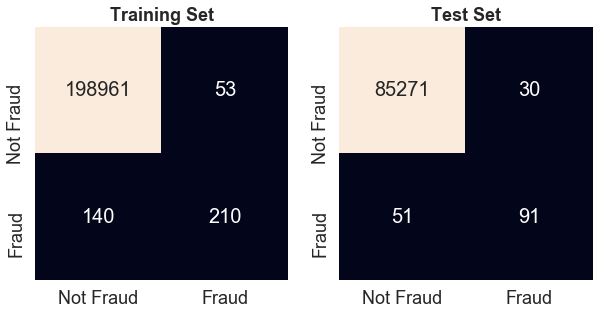

In [44]:
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(cm_train, square=True, annot=True, fmt='d', cbar=False, ax=ax[0], annot_kws={'fontsize': 20})
sns.heatmap(cm_test, square=True, annot=True, fmt='d', cbar=False, ax=ax[1], annot_kws={'fontsize': 20})

for axi in ax:
    axi.set_xticklabels(['Not Fraud', 'Fraud'], fontdict={'fontsize': 18})
    axi.set_yticklabels(['Not Fraud', 'Fraud'], fontdict={'fontsize': 18})

ax[0].set_title('Training Set', fontdict={'fontsize': 18, 'fontweight': 'bold'})
ax[1].set_title('Test Set', fontdict={'fontsize': 18, 'fontweight': 'bold'});

## Change the performance metric

As we saw above, accuracy is not the best metric to use when evaluating imbalanced datasets as it can be very misleading. Metrics that can provide better insight include:

- Confusion Matrix: a table showing correct predictions and types of incorrect predictions.

- Precision: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.

- Recall: the number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.

- F1: Score: the weighted average of precision and recall.

In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: ', precision_score(y_test, y_test_pred))
print('Recall: ', recall_score(y_test, y_test_pred))
print('F1: ', f1_score(y_test, y_test_pred))

Precision:  0.7520661157024794
Recall:  0.6408450704225352
F1:  0.6920152091254753


In [46]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, y_test_pred)

(array([0.99940226, 0.75206612]),
 array([0.9996483 , 0.64084507]),
 array([0.99952527, 0.69201521]),
 array([85301,   142], dtype=int64))

In [47]:
from sklearn.model_selection import cross_validate, StratifiedKFold

scores = cross_validate(LogisticRegression(solver='liblinear'), X, y, cv=StratifiedKFold(n_splits=10), 
                        scoring=['accuracy', 'precision', 'recall', 'f1'], n_jobs=-1)

C:\Users\secan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_recall'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\utils\deprecation

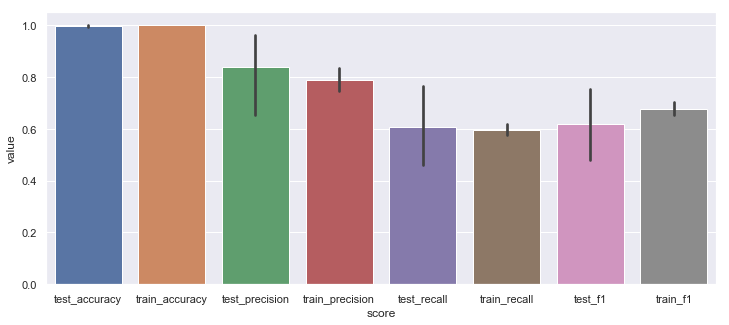

In [48]:
scores_df = pd.DataFrame(scores).drop(['fit_time', 'score_time'], axis=1)
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x='score', y='value', data=scores_df.melt(var_name='score'))

In [68]:
grid = GridSearchCV(LogisticRegression(solver='liblinear'), {'C': [0.1, 1, 10]}, cv=StratifiedKFold(n_splits=3),
                 scoring=['accuracy', 'precision', 'recall', 'f1'], refit='precision', n_jobs=-1)
grid.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.1, 1, 10]}, pre_dispatch='2*n_jobs',
       refit='precision', return_train_score='warn',
       scoring=['accuracy', 'precision', 'recall', 'f1'], verbose=0)

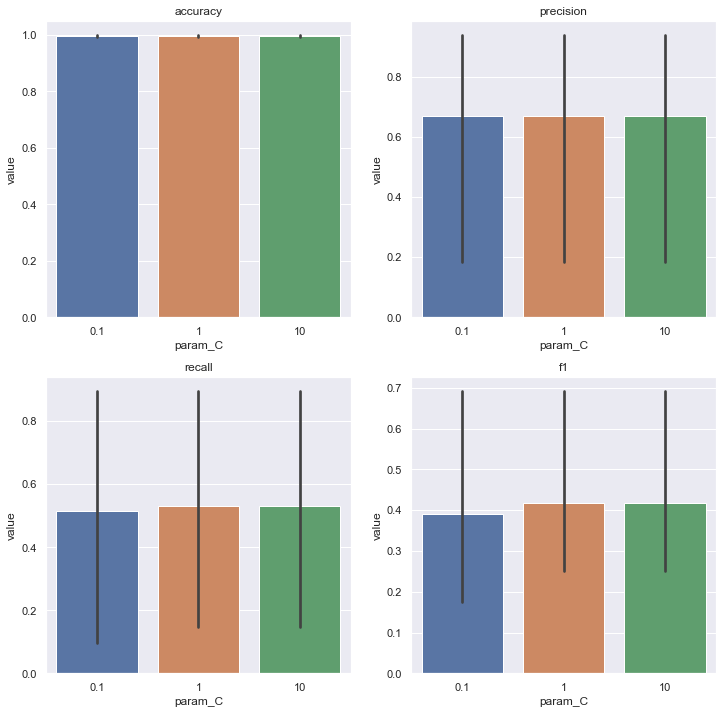

In [70]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
for i, metric in enumerate(['accuracy', 'precision', 'recall', 'f1']):
    metric_cv = pd.DataFrame(grid.cv_results_)[['split{}_test_{}'.format(s, metric) for s in range(3)] + ['param_C']]
    sns.barplot(x='param_C', y='value', data=metric_cv.melt(id_vars='param_C'), ax=ax.flatten()[i])
    ax.flatten()[i].set_title(metric)

## Multiclass Logistic Regression (Softmax)

The logistic regression model arises from the desire to model the posterior
probabilities of the $K$ classes via linear functions in $x$, while at the same
time ensuring that they sum to one and remain in [0, 1]. The model has
the form:

$$log(\frac{P(y=k|x;\theta)}{P(y=K|x;\theta)}) = (\theta^{(k)})^{T} x$$ for $k=1, ..., K-1$.

Note that,

$$P(y=k|x;\theta) = \frac{e^{(\theta^{(k)})^{T}}}{1 + \sum_{j=1}^{K-1}e^{(\theta^{(j)})^{T}}}, k=1, ..., K-1$$

and,

$$P(y=K|x;\theta) = \frac{1}{1 + \sum_{j=1}^{K-1}e^{(\theta^{(j)})^{T}}}$$

#### Cross Entropy Cost Function

$$J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}\sum_{j=1}^{K}y_{k}^{(i)}log(P(y=k|x^{(i)}; \theta))$$

Scikit-Learn’s
LogisticRegression uses one-versus-all by default when you train it on more than two classes, but you
can set the multi_class hyperparameter to "multinomial" to switch it to Softmax Regression instead.
You must also specify a solver that supports Softmax Regression, such as the "lbfgs" solver (see Scikit-
Learn’s documentation for more details). It also applies ℓ2 regularization by default, which you can
control using the hyperparameter C.

In [50]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['class'] = [iris['target_names'][i] for i in iris['target']]

In [53]:
X = iris_df.drop('class', axis=1)
y = iris_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [58]:
print('Precision: ', precision_score(y_test, y_test_pred, average='micro'))

Precision:  0.9777777777777777


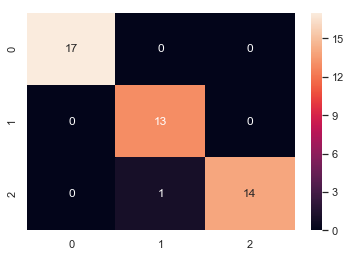

In [61]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAV8AAAEBCAYAAADfMaYGAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAFVNJREFUeJzt3X9w1PWdx/HXhiQcNCwOF0IkZQ4FrB0KVvGAlCJVJBgIQiCDhrsYExFUEhC4QX7oxZsD9CgtI40/sAITECEIJRPaKgTpcVJgLOgEEWsbSIAlkZ/qkgNJsvu9P86mhIRkd5PsZ/nu8zHznfH7Sfb7fc+68+a97+/n84nDsixLAICgijAdAACEI5IvABhA8gUAA0i+AGAAyRcADCD5AoABJF8AMIDkCwAGkHwBwACSLwAYQPIFAANIvgBgQGQwb1Z7/ngwbxd2OvUcbjoEoM3U1Zxu1ev9yTdRsbe36l6BCGryBYCg8XpMR9Aski8Ae7K8piNoFskXgD15Sb4AEHQWlS8AGOCpMx1Bs0i+AOyJB24AYABtBwAwgAduABB8PHADABOofAHAAE+t6QiaRfIFYE+0HQDAANoOAGAAlS8AGEDlCwDBZ3l54AYAwUflCwAG0PMFAAPYWAcADKDyBQADQrzny5+OB2BPnjrfDz9VV1crJSVFLpdLkrRgwQIlJSVp/PjxGj9+vEpKSlq8BpUvAHtqp8q3tLRUzz//vCoqKurHjhw5orfffltxcXE+X4fkC8CWLMv3B25ut1tut7vRuNPplNPpbDC2efNm5eXlad68eZKkK1euqLKyUgsXLtSZM2c0atQo5eTkKCKi+cYCyReAPflR+RYUFCg/P7/ReE5OjnJzcxuMLVmypMH5+fPnNXToUOXl5alLly6aPn26tmzZosmTJzd7T5IvAHvyY7ZDZmamUlNTG41fX/U2pVevXnr11VfrzzMyMlRUVETyBRCm/Kh8m2ov+OqLL75QRUWFRo8eLUmyLEuRkS2nVmY7ALCndpztcC3LsrR06VJ98803qq2tVWFhoUaNGtXi66h8AdhTkBZZ3HnnnZo2bZrS09NVV1enpKQkpaSktPg6h2VZVhDikyTVnj8erFuFpU49h5sOAWgzdTWnW/X6K++t9Pl3OyXPbNW9AkHlew3LsrRo8S/Ur09vZU1J0+xFi3XSVVX/89NVX+reHw9Q/rIXzQVpI2OSR2rx4vnq2LGjPv30cz05ba4uXao2HZathPV7zAq3m8OxipN6YuYClfz33vqxFUue19aCV7W14FW9OH+musTEaNHcGQajtI/Y2G5669e/1ORHpqn/j+5TefkJLV2y0HRYthL277Hl9f0wgOT7nU1bf6tJ40Yr6f7GX91ra2u1aPEv9Nysabq1R3cD0dnPqFEjdPBgqcrKyiVJb6xapynpjaf6IHBh/x4H6YFboFpsOxw7dkw7duzQl19+qYiICMXFxWn48OEaMGBAMOILmkVzn5Ek7fvo40Y/2/rbHYqL/Uc9OGJYsMOyrV7f76lTrsr6c5erSl27OtWlS0z4fC1uZ2H/Ht/MbYcNGzZozpw5kqQBAwaof//+kqQXXnhBa9asaf/oQsT6wiJNy0w3HYatREREqKlnvR5PaO/BejMJ+/c4xNsOzVa+69atU1FRkTp16tRgPCsrS6mpqcrOzm7X4ELB538pk8fj0T/fba9K37STp05r8OC7688TEuJ18eJXunz5isGo7CXs3+ObufKNjIxUXV3jfsi3336rqKiodgsqlBz85FMNvucuORwO06HYSknJHg0ZfI/69r1NkjR9WoaKt+80HJW9hP177PX6fhjQbOX71FNPacKECUpMTFT37t3lcDh09uxZHThwQLNnzw5WjEadcFUq4dYepsOwnXPnLmjqk3NUuOlNRUdH6fixE3o8e5bpsGwl7N/j4C1hCEiLiyzOnDmj/fv36+zZs/J6vYqPj1diYqJ69PA/IbHIon2xyAJ20upFFhte8Pl3O/3Lf7bqXoFocbZDjx49NGHChGDEAgBth7/hBgAGhPgDN5IvAHsK8Z4vyReAPVH5AoABJF8ACD4rxFfykXwB2BOVLwAYwFQzADDAy2wHAAg+2g4AYAAP3ADAACpfADCAni8AGMBsBwAwgMoXAILPoucLAAYw2wEADKDtAAAG0HYAAANCvPJt9k/HA8BNy/L6fvipurpaKSkpcrlckqTCwkKlpKRo3LhxWrBggWpqalq8BskXgD15Ld8PP5SWlio9PV0VFRWSpPLycq1evVqbNm1ScXGxvF6v3nnnnRavQ/IFYEtWncfnwx+bN29WXl6e4uLiJEnR0dHKy8tTTEyMHA6H7rjjDlVWVrZ4HXq+AOzJj4rW7XbL7XY3Gnc6nXI6nQ3GlixZ0uA8ISFBCQkJkqSLFy9qw4YNeumll1q8J8kXgD350cstKChQfn5+o/GcnBzl5ub6dI0zZ85o6tSpmjRpkoYMGdLi75N8AdiTH5VvZmamUlNTG41fX/XeyLFjxzR16lRlZGQoOzvbp9eQfAHYkuVH8m2qveCr6upqPfHEE3r22Wc1YcIEn19H8gVgT34+SAvUli1bdP78ea1du1Zr166VJD3wwAOaNWtWs69zWJYVtJnIteePB+tWYalTz+GmQwDaTF3N6Va9/tIzyT7/bpfX3mvVvQJB5QvAnkJ8hRvJF4AtBfFLfUBIvgDsicr37+hJti/3y2NMhxAWnPN/bzoE+ILkCwDBZ9WxpSQABF9o516SLwB78meRhQkkXwD2RPIFAANoOwBA8NF2AAADrDqSLwAEH20HAAi+AP4uZlCRfAHYE8kXAIKPyhcADLDqTEfQPJIvAFui8gUAA0i+AGCC5TAdQbNIvgBsicoXAAywvFS+ABB0Xg/JFwCCjrYDABhA2wEADAjxvxxP8gVgT1S+AGAAD9wAwAAqXwAwwGKFGwAEX6hPNYswHQAAtAev5fD58Mebb76p0aNHa9y4cXr99dcDjo/kC8CWLMvh8+Grffv2afv27dq6dauKiopUWlqqnTt3BhQfbQcAtuTPbAe32y23291o3Ol0yul01p8fPXpUP/3pTxUTEyNJGj58uHbt2qWkpCS/46PyBWBLltfh81FQUKCRI0c2OgoKChpcs3///tq7d6++/vprXb16Vbt379b58+cDio/KF4At+dPLzczMVGpqaqPxa6teSUpMTNTEiROVkZGhW265RYmJiSotLQ0oPpLvDYxJHqnFi+erY8eO+vTTz/XktLm6dKnadFi2ED06S97zp1V3aKcU3UnRSZmK6BYvORyqO7pfdX9633SIthHOn2N/ernXtxdupLq6WklJScrKypIkvfXWW+rVq1dA8dF2aEJsbDe99etfavIj09T/R/epvPyEli5ZaDqsm56jW7w6ps1VhzsG1Y9FDRsvq/orfbvuRX27YYkiB45QxK23G4zSPsL9c2xZvh++crlceuaZZ1RXV6dLly5py5YtSk5ODig+km8TRo0aoYMHS1VWVi5JemPVOk1Jb/yVBP6J/PH9qjvyoTx/OVQ/VvuHTard864kyRHTVY4OkbKuXjEVoq2E++e4Paaa3XnnnUpKStLDDz+stLQ0ZWZmatCgQS2/sAm0HZrQ6/s9dcpVWX/uclWpa1enunSJCZuvbO2hdvdGSVKHf+rf8AeWV9HJT6hDv0HylH0i66svDURnP+H+Ofa20/LiGTNmaMaMGa2+TrPJt7Kysrkfq2fPnq0OIBRFRETIauK7iMfjMRBNeKh5b7W06211HPe0ooaOU+3+YtMh3fTC/XPs7+KJYGs2+U6fPl0VFRWKi4tr9D/R4XDogw8+aNfgTDl56rQGD767/jwhIV4XL36ly5f5OtzWIv6pv6zzLln/+41Ue1V1f/5Ikf3uMR2WLYT75zjU93Zotue7ceNG3XbbbVq2bJl2797d4LBr4pWkkpI9GjL4HvXte5skafq0DBVvD2wVC5oX+YN7FZk47v9POkQq8gf3ynPqz2aDsolw/xy31/LittJs5RsTE6PFixfr3XffDbipfDM6d+6Cpj45R4Wb3lR0dJSOHzuhx7NnmQ7Llmr2bFb0yH/VPzz2oiTJU/aJ6j627z/swRTun+MQ/0MWclhNNYXaSWR0QrBuFZbcL48xHUJYcM7/vekQwkJdzelWvf6P8Wk+/+6wL7e06l6BYLYDAFsK8R0lSb4A7MlSaD9wI/kCsCVviDd9Sb4AbMlL5QsAwUfbAQAM8JB8ASD4mO0AAAaQfAHAAHq+AGBAO+0o2WZIvgBsialmAGBAqO9aTPIFYEteB5UvAARdiK8uJvkCsCemmgGAAcx2AAADWF4MAAZQ+QKAAfR8AcAAZjsAgAG0HQDAANoOAGCAh8oXAIIv1CvfCNMBAEB78Ppx+GP37t2aOHGikpOTtXjx4oDjI/kCsCXLj8NXp06dUl5enl577TUVFxfr6NGj2rNnT0Dx0XYAYEvtMduhpKREY8aMUXx8vCRpxYoV6tixY0DXIvkCsCV/2glut1tut7vRuNPplNPprD8/ceKEoqKi9NRTT6mqqko/+9nP9OyzzwYUH8kXgC35s5l6QUGB8vPzG43n5OQoNzf379f0eHTw4EGtX79enTt31tNPP61t27Zp4sSJfsdH8gVgS/60HTIzM5Wamtpo/NqqV5JiY2OVmJiobt26SZIefPBBHT58mOQLAH/jT9vh+vbCjdx///167rnn5Ha79b3vfU8ffvihRo4cGVB8JF8bcc7/vWI7t/wBQutcKphqOgT4oD32drjrrrs0depUTZkyRbW1tRo2bJgmTZoU0LVIvjZC4gX+zttOW+ukpaUpLS2t1dch+QKwJf56MQAYEOrLi0m+AGyJLSUBwID26vm2FZIvAFsK7dRL8gVgU/R8AcAAT4jXviRfALZE5QsABvDADQAMCO3US/IFYFO0HQDAAB64AYAB9HwBwIDQTr0kXwA2ReULAAbwwA0ADLCofAEg+JjtAAAG0HYAAAO8FpUvAARdaKdeki8Am2KqGQAYwGwHADCgjuQLAMFH5QsABjDVDAAMsJhqBgDBx2wHADCA5cUAYEB7Vb6vvPKKduzYIYfDobS0NGVlZQV0nYg2jss2xiSP1MeHSvTZkf/Rpo2r1KVLjOmQbGvl6y/p6ZzAPsBozLIsPb/tgAr++OdGP5uzaa9e+t0hA1EFn2VZPh+++uijj3TgwAEVFxdr69atWr9+vY4fPx5QfCTfJsTGdtNbv/6lJj8yTf1/dJ/Ky09o6ZKFpsOynX533K4txWuV8nCS6VBs4/i5bzSt4A/adfRUo5+t3fu5Pjl5zkBUZnj9OHw1ePBgrVu3TpGRkbpw4YI8Ho86d+4cUHy0HZowatQIHTxYqrKycknSG6vW6eODJcqdSQJuS1lTp2jDui067aoyHYptFH5UptR7bld814YJ4U/lZ7SvrEpp9/aR+0qtoeiCy595vm63W263u9G40+mU0+lsMBYVFaWVK1dqzZo1euihh9SjR4+A4mux8t21a5fWr1+vkydPNhgvLCwM6IY3g17f76lTrsr6c5erSl27Omk9tLGF8xZr25bfmQ7DVhaMHaQxA3s3GDvrvqKfv/+Jlk5KVITDYSYwA7yyfD4KCgo0cuTIRkdBQUGT1545c6b279+vqqoqbd68OaD4mq18ly9friNHjqhPnz564403NG/ePI0fP16StGnTJj3yyCMB3TTURURENNkH8ng8BqIBAlfr8WrB1n36t9F3q3uXTqbDCSqP5XtDITMzU6mpqY3Gr696jx07ppqaGv3whz9Up06dlJSUpC+++CKg+JpNvnv27NG2bdsUGRmpjIwMZWdnKzo6WsnJySE/gbk1Tp46rcGD764/T0iI18WLX+ny5SsGowL8d7TyolxfVWv5jk8kSReqv5XXslRT51He+MGGo2tf/rQdmmovNMXlcmnlypXauHGjJOmDDz7QpEmTAoqv2eRrWZYc331N6d27t1atWqWsrCx169atftyOSkr26Of/9e/q2/c2lZWVa/q0DBVv32k6LMBvd/WK1Y454+vPX//Dp/r6co0WjB1kMKrgaI/N1EeMGKHDhw9rwoQJ6tChg5KSkjR27NiArtVs8n3ooYeUkZGh+fPna+DAgerXr59eeeUV5eTkqKamJqAb3gzOnbugqU/OUeGmNxUdHaXjx07o8exZpsMC4If2+m6em5ur3NzcVl/HYbXQP9i/f7/i4uLUp0+f+rGqqiqtWbNGixYt8utmkdEJgUUJn8R2bvlrE1qv/PXJpkMIC53S/6NVrx+W8IDPv/vH07tbda9AtDjVLDExsdHYrbfe6nfiBYBgYm8HADDAn9kOJpB8AdgSm6kDgAGhPh2W5AvAluj5AoABVL4AYIAnxP+KG8kXgC21xwq3tkTyBWBLzHYAAAOofAHAACpfADCAyhcADGB5MQAYQNsBAAywqHwBIPhYXgwABrC8GAAMoPIFAAM8Xnq+ABB0zHYAAAPo+QKAAfR8AcAAKl8AMIAHbgBgAG0HADCAtgMAGMCWkgBgAPN8AcCAUK98I0wHAADtwWt5fT78sX37do0ZM0ZJSUnasGFDwPFR+QKwpfZ44HbmzBmtWLFCv/nNbxQdHa1HH31UQ4YMUd++ff2+FskXgC35k3zdbrfcbnejcafTKafTWX++b98+DR06VLfccoskafTo0Xr//feVk5Pjd3xBTb51NaeDeTsAYazWj3zzq1/9Svn5+Y3Gc3JylJubW39+9uxZde/evf48Li5Ohw8fDig+Kl8AYS8zM1OpqamNxq+teiXJ6/XK4XDUn1uW1eDcHyRfAGHv+vbCjcTHx+vgwYP15+fOnVNcXFxA92S2AwD46Cc/+Yn279+vixcv6sqVK9q5c6fuu+++gK5F5QsAPurRo4dmz56txx57TLW1tUpLS9PAgQMDupbDCvUF0ABgQ7QdAMAAki8AGEDyBQADSL4AYADJ9wbaavMMNK+6ulopKSlyuVymQ7Gl/Px8jR07VmPHjtWyZctMh4NrkHyb8LfNM9555x0VFRWpsLBQZWVlpsOyndLSUqWnp6uiosJ0KLa0b98+7d27V9u2bVNRUZE+++wzlZSUmA4L3yH5NuHazTM6d+5cv3kG2tbmzZuVl5cX8AohNK979+6aP3++oqOjFRUVpT59+qiystJ0WPgOiyya0JabZ+DGlixZYjoEW+vXr1/9f1dUVOi9997Txo0bDUaEa1H5NqEtN88ATPvrX/+q7OxszZs3T7179zYdDr5D8m1CfHy8zp07V3/ems0zAJMOHTqkxx9/XHPnzm1y1y6YQ/JtQltungGYUlVVpRkzZmj58uUaO3as6XBwHXq+TWjLzTMAU1avXq2rV6/q5Zdfrh979NFHlZ6ebjAq/A0b6wCAAbQdAMAAki8AGEDyBQADSL4AYADJFwAMIPkCgAEkXwAwgOQLAAb8Hyir6j0hffR1AAAAAElFTkSuQmCC